In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Cleaning

In [15]:
df_clean = df

In [16]:
# Spliting date time column
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Split into day and month columns
df_clean['day'] = df_clean['date'].dt.day
df_clean['month'] = df_clean['date'].dt.month
# Skipping year since the data is from the same year 

df_clean['time'] = df_clean['date'].dt.time

# Drop the datetime column
df_clean.drop(['date'],axis=1,inplace=True)

In [17]:
df_clean

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,day,month,time
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,11,1,17:00:00
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,11,1,17:10:00
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,11,1,17:20:00
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,11,1,17:30:00
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,11,1,17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,27,5,17:20:00
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,27,5,17:30:00
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,27,5,17:40:00
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,27,5,17:50:00


In [18]:
df_clean['total'] = df_clean['Appliances'] + df_clean['lights']
df_clean.drop(['Appliances','lights'],axis=1,inplace=True)

In [19]:
df_clean.drop(['rv1','rv2'],axis=1,inplace=True)

In [20]:
df_clean

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,time,total
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,11,1,17:00:00,90
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,11,1,17:10:00,90
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,11,1,17:20:00,80
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,11,1,17:30:00,90
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,11,1,17:40:00,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,...,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,27,5,17:20:00,100
19731,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,...,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,27,5,17:30:00,90
19732,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,...,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,27,5,17:40:00,280
19733,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,...,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,27,5,17:50:00,430


In [21]:
# Linear regression does not support datetime format, hence we convert the column to hours and minutes

df_clean['time'] = pd.to_datetime(df_clean['time'], format='%H:%M:%S')

df_clean['hour'] = df_clean['time'].dt.hour
df_clean['minute'] = df_clean['time'].dt.minute

df_clean.drop(['time'],axis=1,inplace=True)
df_clean

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,total,hour,minute
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,733.5,92.000000,7.000000,63.000000,5.300000,11,1,90,17,0
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,733.6,92.000000,6.666667,59.166667,5.200000,11,1,90,17,10
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,733.7,92.000000,6.333333,55.333333,5.100000,11,1,80,17,20
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,733.8,92.000000,6.000000,51.500000,5.000000,11,1,90,17,30
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,733.9,92.000000,5.666667,47.666667,4.900000,11,1,100,17,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,...,755.2,55.666667,3.333333,23.666667,13.333333,27,5,100,17,20
19731,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,...,755.2,56.000000,3.500000,24.500000,13.300000,27,5,90,17,30
19732,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,...,755.2,56.333333,3.666667,25.333333,13.266667,27,5,280,17,40
19733,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,...,755.2,56.666667,3.833333,26.166667,13.233333,27,5,430,17,50


In [22]:
df_clean.to_csv("clean_data.csv")

# Train-test split of the data before fitting with models

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

# X and y split
X = df_clean.drop('total', axis=1)
y = df_clean['total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
a = pd.DataFrame({'Training Data':[len(X_train)],'Testing Data':[len(X_test)]})
a

,Training Data,Testing Data
0,15788,3947


# Linear Regression 
# Lasso and Ridge Regression

Mean Absolute Error: 54.68567722520102
R-squared: 0.15828884275092447


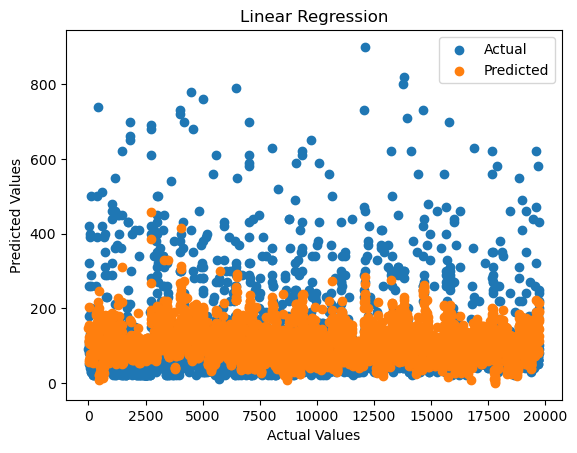

In [48]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression")
plt.show()



In [13]:
# Importing necessary libraries
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f'Mean Absolute Error: {mae_ridge}')
print(f'R-squared: {r2_ridge}')

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f'Mean Absolute Error: {mae_lasso}')
print(f'R-squared: {r2_lasso}')


Ridge Regression:
Mean Absolute Error: 54.685153433617465
R-squared: 0.15829117837447781

Lasso Regression:
Mean Absolute Error: 54.34609192068826
R-squared: 0.1553199013971761


# Random Forest

Mean Absolute Error: 30.11578413985305
R-squared: 0.6142038626835538


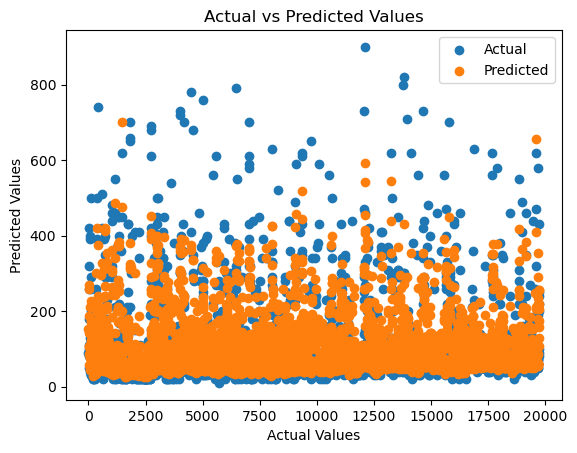

In [31]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = model.feature_importances_
features = X.columns

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()



In [15]:
for i in range(len(feature_importances)):
    print(df_clean.columns[i],"----",feature_importances[i])

T1 ---- 0.024235175737202456
RH_1 ---- 0.036295684335207565
T2 ---- 0.02754391358507515
RH_2 ---- 0.040125438418426224
T3 ---- 0.051297048741433655
RH_3 ---- 0.047564676740897115
T4 ---- 0.03027266391447259
RH_4 ---- 0.03255578559130459
T5 ---- 0.026816467537704263
RH_5 ---- 0.03478923963857721
T6 ---- 0.032116044450942384
RH_6 ---- 0.029682086637299543
T7 ---- 0.028315789504558823
RH_7 ---- 0.03206182861660665
T8 ---- 0.03636815758387064
RH_8 ---- 0.03333088541163541
T9 ---- 0.019557997164233277
RH_9 ---- 0.034659363059534085
T_out ---- 0.03508859735522377
Press_mm_hg ---- 0.04601096286148806
RH_out ---- 0.0303235045561659
Windspeed ---- 0.02505361319457739
Visibility ---- 0.022077486193162268
Tdewpoint ---- 0.03419148636692294
day ---- 0.019460197307100236
month ---- 0.0091002234548431
total ---- 0.16265159235515952
hour ---- 0.01845408968637529


In [16]:
# Try different n values for random forest

Mean Absolute Error: 29.91099569293134
R-squared: 0.6199269891647257


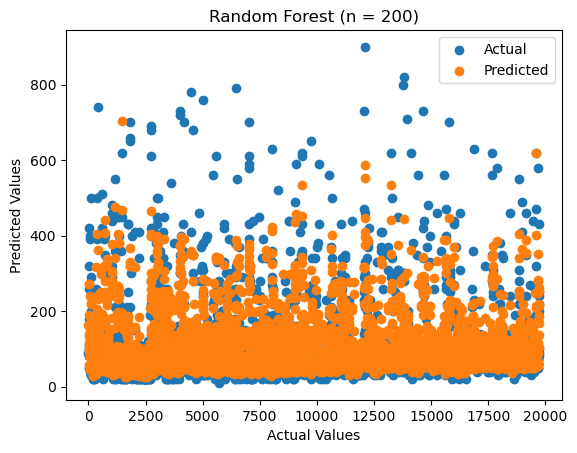

In [52]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = model.feature_importances_
features = X.columns

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest (n = 200)")
plt.show()

Mean Absolute Error: 30.33255637192805
R-squared: 0.6090726645637693


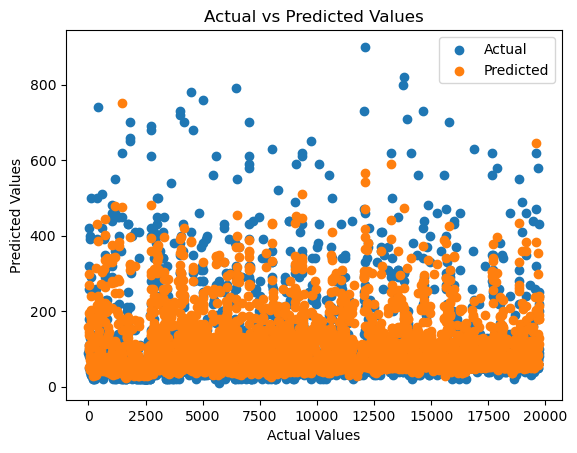

In [33]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = model.feature_importances_
features = X.columns

# Plot the predicted values against the actual values

plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

Mean Absolute Error: 32.3400050671396
R-squared: 0.5562696797358284


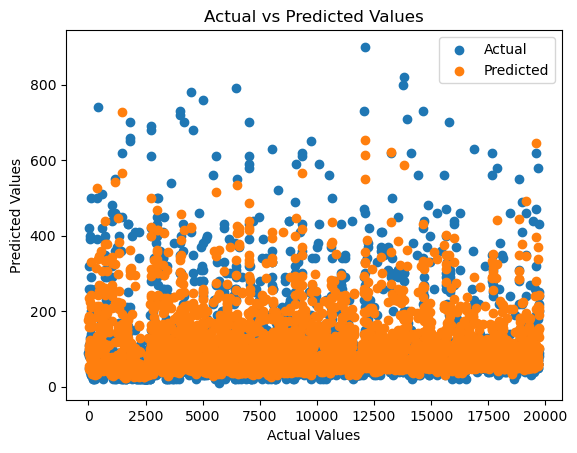

In [34]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = model.feature_importances_
features = X.columns

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# SVM
### Linear, Polynomial, RBF, Sigmoid

Mean Absolute Error: 45.05839389991348
R-squared: 0.04929178173699755


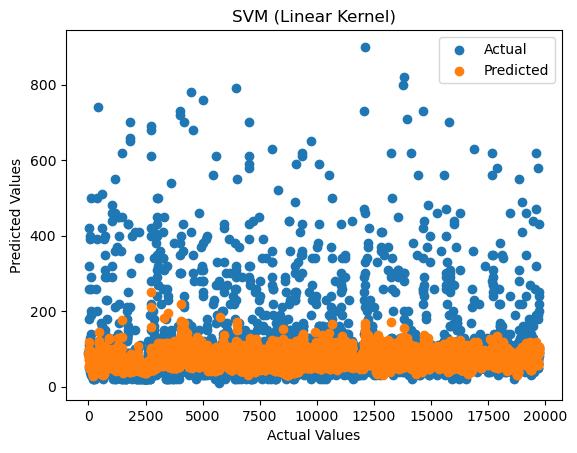

In [51]:
# Importing necessary libraries
from sklearn.svm import SVR


# X and y split
X = df_clean.drop('total', axis=1)
y = df_clean['total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine regression model
model = SVR(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVM (Linear Kernel)")
plt.show()


Mean Absolute Error: 50.588507475034206
R-squared: -0.10570939129205281


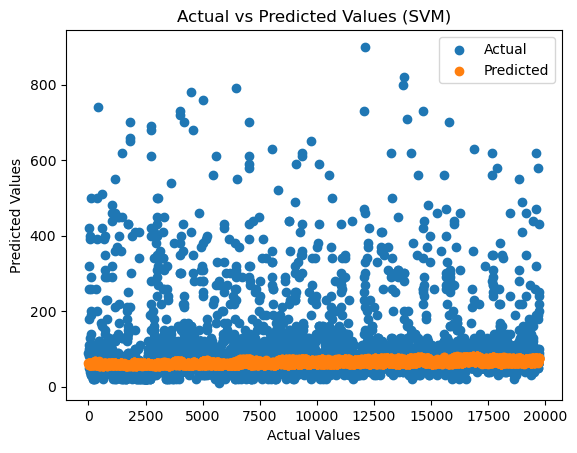

In [36]:
# Create a Support Vector Machine regression model
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (SVM)")
plt.show()


Mean Absolute Error: 49.9658276607539
R-squared: -0.09339035072939872


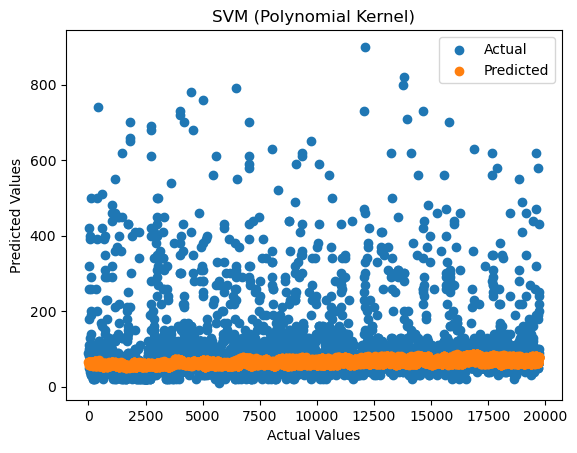

In [55]:
# Create a Support Vector Machine regression model
model = SVR(kernel='poly')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVM (Polynomial Kernel)")
plt.show()


Mean Absolute Error: 51.60936345876345
R-squared: -0.13308929387426027


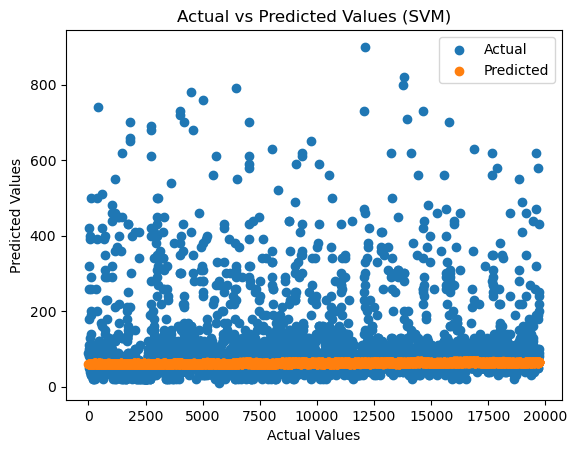

In [38]:
# Create a Support Vector Machine regression model
model = SVR(kernel='sigmoid')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (SVM)")
plt.show()


# XGBoost

### Dart

Mean Absolute Error: 40.20356880673161
R-squared: 0.1270724803251757


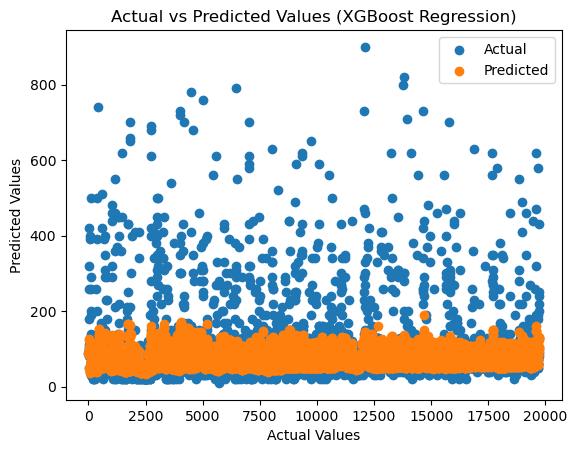

In [39]:
from xgboost import XGBRegressor

# Create an XGBoost regression model
model = XGBRegressor(objective ='reg:absoluteerror',booster='dart',n_estimators=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (XGBoost Regression)")
plt.show()


Mean Absolute Error: 34.20298567125095
R-squared: 0.35962542945869624


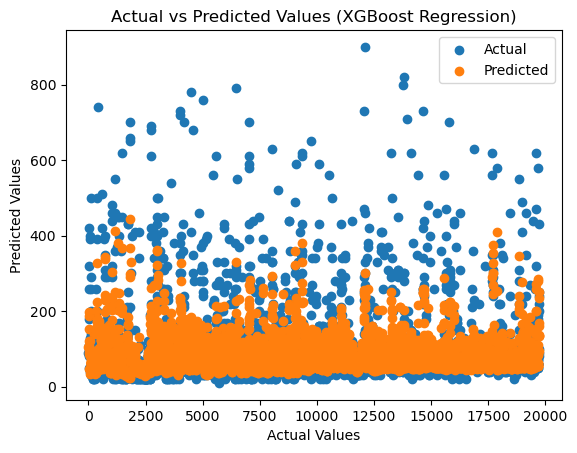

In [40]:
from xgboost import XGBRegressor

# Create an XGBoost regression model
model = XGBRegressor(objective ='reg:absoluteerror',booster='dart',n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (XGBoost Regression)")
plt.show()


Mean Absolute Error: 33.225326566113864
R-squared: 0.403393777492271


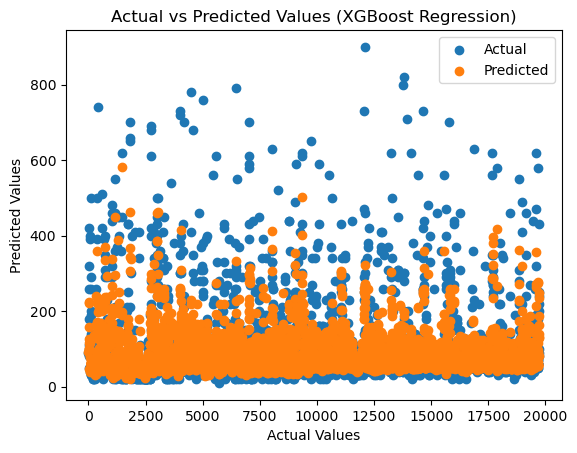

In [41]:
from xgboost import XGBRegressor

# Create an XGBoost regression model
model = XGBRegressor(objective ='reg:absoluteerror',booster='dart',n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (XGBoost Regression)")
plt.show()


Mean Absolute Error: 32.4322438188103
R-squared: 0.44857338060810614


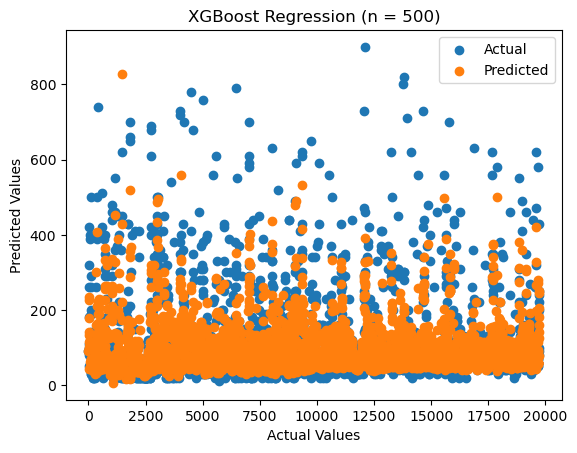

In [53]:
from xgboost import XGBRegressor

# Create an XGBoost regression model
model = XGBRegressor(objective ='reg:absoluteerror',booster='dart',n_estimators=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regression (n = 500)")
plt.show()


Mean Absolute Error: 49.491108040221285
R-squared: -0.06957991452956036


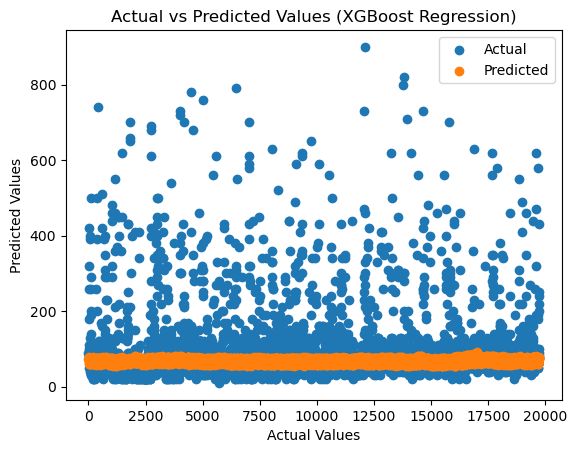

In [43]:
from xgboost import XGBRegressor

# Create an XGBoost regression model
model = XGBRegressor(objective ='reg:absoluteerror',booster='gblinear', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (XGBoost Regression)")
plt.show()


# K-NN

Mean Absolute Error: 53.685381302254875
R-squared: 0.1592918842979536


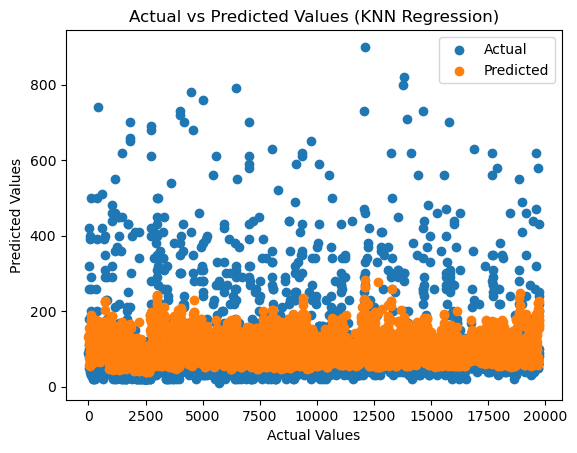

In [44]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=50)  # You can adjust the number of neighbors (k)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (KNN Regression)")
plt.show()


Mean Absolute Error: 51.448999239929066
R-squared: 0.19863798105354835


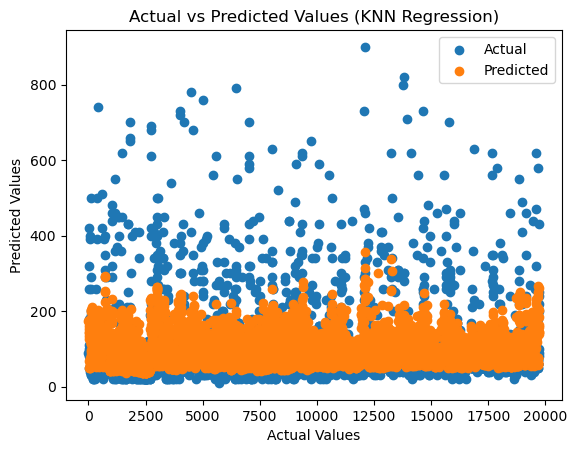

In [45]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=25)  # You can adjust the number of neighbors (k)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (KNN Regression)")
plt.show()


Mean Absolute Error: 47.97441094502153
R-squared: 0.2572877082238927


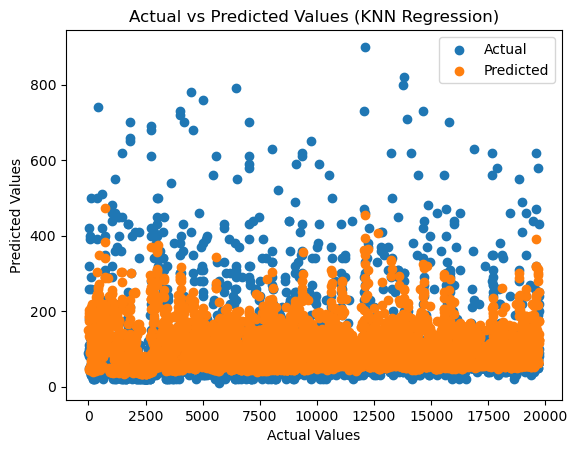

In [46]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=10)  # You can adjust the number of neighbors (k)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (KNN Regression)")
plt.show()


Mean Absolute Error: 45.758297441094506
R-squared: 0.28756344535371237


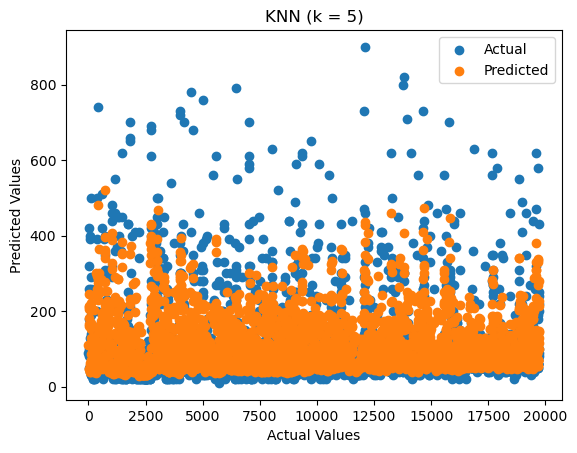

In [54]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN (k = 5)")
plt.show()
